# Average Temperature Prediction Using k-Nearest Neighbors Regression.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV

## Data Preprocessing

### Importing data

In [2]:
# Importing data
df = pd.read_csv("city_temperature.csv")

# Select rows where 'City' is either 'Colombo' or 'Montreal' because data size si too large and my computer cannot allocate memory
selected_cities = ['Colombo', 'Montrea']
df = df[df['City'].isin(selected_cities)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8084\3729414846.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("city_temperature.csv")


### Handling Missing Values

In [3]:
# Checking for Null values
df.isnull().sum()


Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [4]:
# Drop columns with null values : State Column
df = df.dropna(axis=1)
df

,Region,Country,City,Month,Day,Year,AvgTemperature
506037,Asia,Sri Lanka,Colombo,1,1,1995,86.1
506038,Asia,Sri Lanka,Colombo,1,2,1995,79.2
506039,Asia,Sri Lanka,Colombo,1,3,1995,81.5
506040,Asia,Sri Lanka,Colombo,1,4,1995,79.5
506041,Asia,Sri Lanka,Colombo,1,5,1995,81.0
...,...,...,...,...,...,...,...
515298,Asia,Sri Lanka,Colombo,5,9,2020,85.2
515299,Asia,Sri Lanka,Colombo,5,10,2020,84.0
515300,Asia,Sri Lanka,Colombo,5,11,2020,81.9
515301,Asia,Sri Lanka,Colombo,5,12,2020,84.2


### Visualization of data

In [5]:
# Creating date column using existing day month and year columns
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]).astype(str)
# Set 'Date' as the index
df.set_index('Date', inplace=True)
df

,Region,Country,City,Month,Day,Year,AvgTemperature
Date,,,,,,,
1995-01-01,Asia,Sri Lanka,Colombo,1,1,1995,86.1
1995-01-02,Asia,Sri Lanka,Colombo,1,2,1995,79.2
1995-01-03,Asia,Sri Lanka,Colombo,1,3,1995,81.5
1995-01-04,Asia,Sri Lanka,Colombo,1,4,1995,79.5
1995-01-05,Asia,Sri Lanka,Colombo,1,5,1995,81.0
...,...,...,...,...,...,...,...
2020-05-09,Asia,Sri Lanka,Colombo,5,9,2020,85.2
2020-05-10,Asia,Sri Lanka,Colombo,5,10,2020,84.0
2020-05-11,Asia,Sri Lanka,Colombo,5,11,2020,81.9


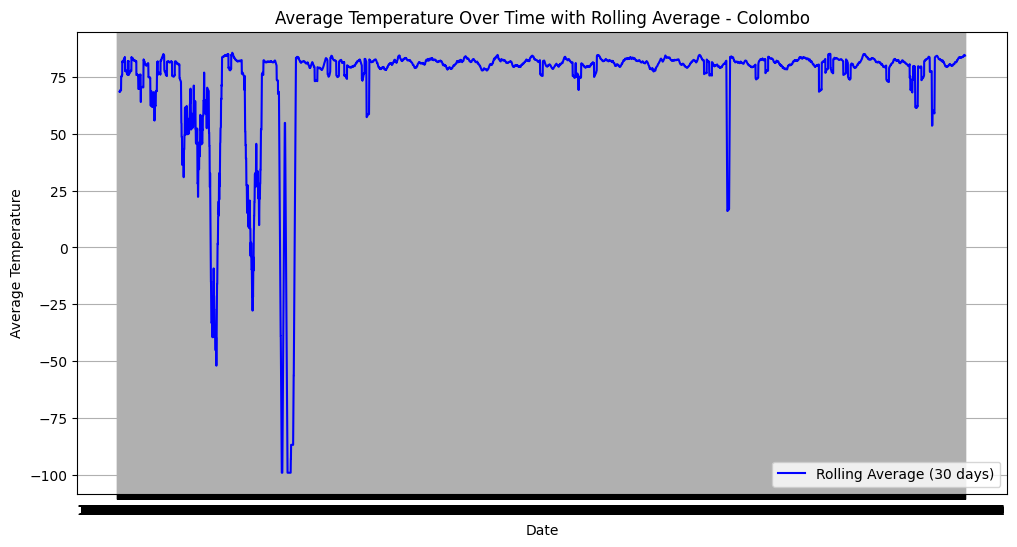

In [6]:
city_column = 'City'
unique_cities = df[city_column].unique()

# Iterate through each unique city
for city in unique_cities:
    # Filter the DataFrame for the specific region
    selected_df = df[df[city_column] == city]
    
    # Sort DataFrame by date
    selected_df.sort_index(inplace=True)
    
    # Calculate the rolling average over a specified window
    window_size = 30
    selected_df['RollingAvg'] = selected_df['AvgTemperature'].rolling(window=window_size).mean()

    # Plot the Rolling Average over time for each region
    plt.figure(figsize=(12, 6))
    plt.plot(selected_df.index, selected_df['RollingAvg'], label=f'Rolling Average ({window_size} days)', color='blue')
    plt.title(f'Average Temperature Over Time with Rolling Average - {city}')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

### Handling Outliers

Index(['1995-01-17', '1995-01-30', '1995-02-06', '1995-02-24', '1995-03-31',
       '1995-05-10', '1995-08-02', '1995-08-22', '1995-09-18', '1995-09-19',
       ...
       '2018-11-06', '2018-11-14', '2018-11-15', '2018-11-17', '2019-01-23',
       '2019-04-24', '2019-05-16', '2019-05-17', '2019-05-18', '2019-05-19'],
      dtype='object', name='Date', length=408)


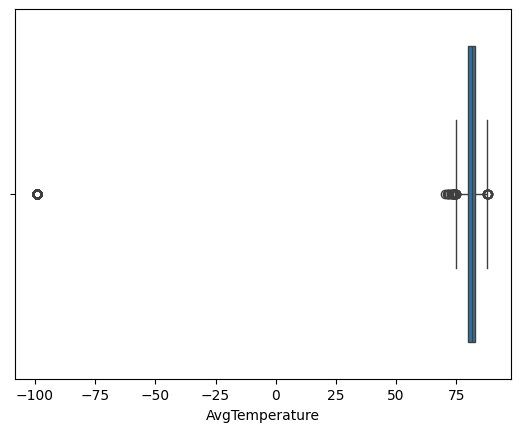

In [7]:
# Checking for outliers in data set
Q1 = df['AvgTemperature'].quantile(0.25)
Q3 = df['AvgTemperature'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['AvgTemperature'] < (Q1 - 1.5 * IQR)) | (df['AvgTemperature'] > (Q3 + 1.5 * IQR)))
print(df.index[outliers])

sns.boxplot(x=df['AvgTemperature'])
plt.show()


In [8]:
# Imputing outliers with median
df.loc[outliers, 'AvgTemperature'] = df['AvgTemperature'].median()
df


,Region,Country,City,Month,Day,Year,AvgTemperature
Date,,,,,,,
1995-01-01,Asia,Sri Lanka,Colombo,1,1,1995,86.1
1995-01-02,Asia,Sri Lanka,Colombo,1,2,1995,79.2
1995-01-03,Asia,Sri Lanka,Colombo,1,3,1995,81.5
1995-01-04,Asia,Sri Lanka,Colombo,1,4,1995,79.5
1995-01-05,Asia,Sri Lanka,Colombo,1,5,1995,81.0
...,...,...,...,...,...,...,...
2020-05-09,Asia,Sri Lanka,Colombo,5,9,2020,85.2
2020-05-10,Asia,Sri Lanka,Colombo,5,10,2020,84.0
2020-05-11,Asia,Sri Lanka,Colombo,5,11,2020,81.9


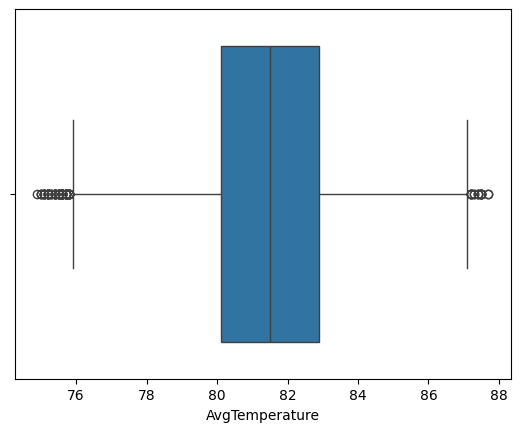

In [9]:
sns.boxplot(x=df['AvgTemperature'])
plt.show()

### Visualizing data without outliers

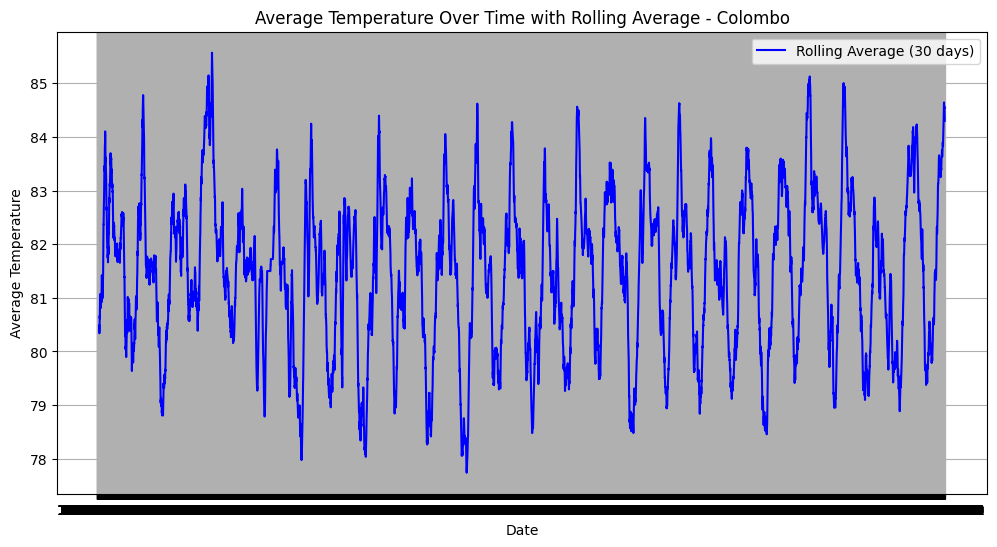

In [10]:
city_column = 'City'
unique_cities = df[city_column].unique()

# Iterate through each unique city
for city in unique_cities:
    # Filter the DataFrame for the specific region
    selected_df = df[df[city_column] == city]
    
    # Sort DataFrame by date
    selected_df.sort_index(inplace=True)
    
    # Calculate the rolling average over a specified window
    window_size = 30
    selected_df['RollingAvg'] = selected_df['AvgTemperature'].rolling(window=window_size).mean()

    # Plot the Rolling Average over time for each region
    plt.figure(figsize=(12, 6))
    plt.plot(selected_df.index, selected_df['RollingAvg'], label=f'Rolling Average ({window_size} days)', color='blue')
    plt.title(f'Average Temperature Over Time with Rolling Average - {city}')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

### Selecting Features and the Targets

In [11]:
# Selecting feature and
X = df.drop(columns=["AvgTemperature"], axis=1)
y = df["AvgTemperature"]

### Handling Categorical features using one-hot encoding

In [12]:
#One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=["Region", "Country", "City"])

X_numerical = X_encoded.astype(int)
print(X_numerical)

            Month  Day  Year  Region_Asia  Country_Sri Lanka  City_Colombo
Date                                                                      
1995-01-01      1    1  1995            1                  1             1
1995-01-02      1    2  1995            1                  1             1
1995-01-03      1    3  1995            1                  1             1
1995-01-04      1    4  1995            1                  1             1
1995-01-05      1    5  1995            1                  1             1
...           ...  ...   ...          ...                ...           ...
2020-05-09      5    9  2020            1                  1             1
2020-05-10      5   10  2020            1                  1             1
2020-05-11      5   11  2020            1                  1             1
2020-05-12      5   12  2020            1                  1             1
2020-05-13      5   13  2020            1                  1             1

[9266 rows x 6 columns]


### Finding the Optimal Number of clusters(k) using elbow method

c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

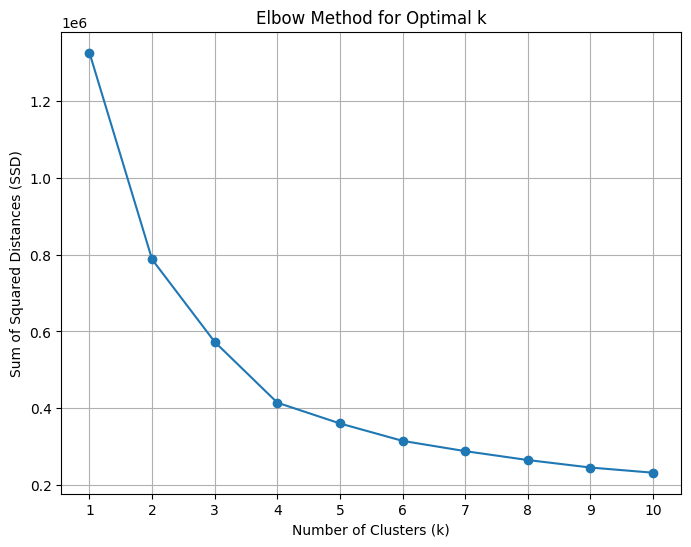

In [13]:
k_values = range(1,11)
ssd = []  # To store the Sum of Squared Distances

# Calculate SSD for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_numerical)
    ssd.append(kmeans.inertia_)  # Sum of Squared Distances for each k

# Plotting SSD values for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Dividing the Data into training set and testing set and validation set
Validation set avoid the model from over fitting and selected randomly to 

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X_numerical, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Feature scaling to avoid biasing

In [15]:
# Use StandardScaler on the KMeans-transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

            Month  Day  Year  Region_Asia  Country_Sri Lanka  City_Colombo
Date                                                                      
2018-06-18      6   18  2018            1                  1             1
2001-05-03      5    3  2001            1                  1             1
2010-12-18     12   18  2010            1                  1             1
2011-01-15      1   15  2011            1                  1             1
2008-10-24     10   24  2008            1                  1             1
...           ...  ...   ...          ...                ...           ...
2010-09-13      9   13  2010            1                  1             1
2009-03-19      3   19  2009            1                  1             1
2009-10-04     10    4  2009            1                  1             1
1997-05-10      5   10  1997            1                  1             1
2014-11-27     11   27  2014            1                  1             1

[6486 rows x 6 columns]


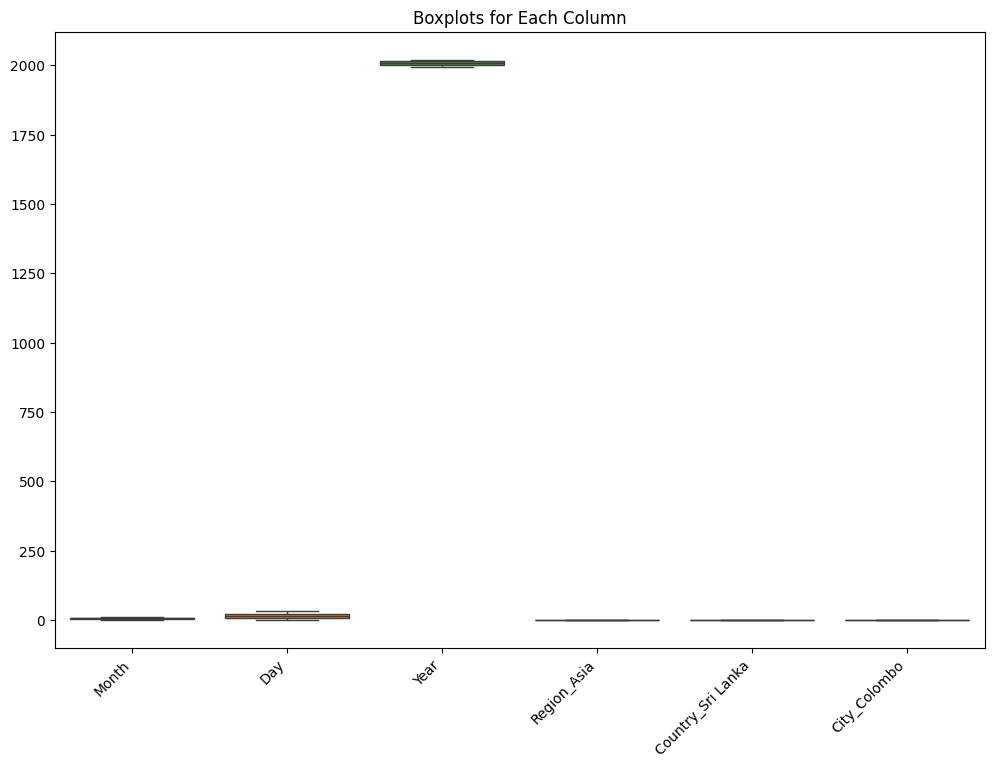

[[-0.13860121  0.25690192  1.47581482  0.          0.          0.        ]
 [-0.42868429 -1.44510611 -0.85487301  0.          0.          0.        ]
 [ 1.60189728  0.25690192  0.37902055  0.          0.          0.        ]
 ...
 [ 1.02173111 -1.33163891  0.24192126  0.          0.          0.        ]
 [-0.42868429 -0.65083569 -1.40327014  0.          0.          0.        ]
 [ 1.31181419  1.27810674  0.92741768  0.          0.          0.        ]]


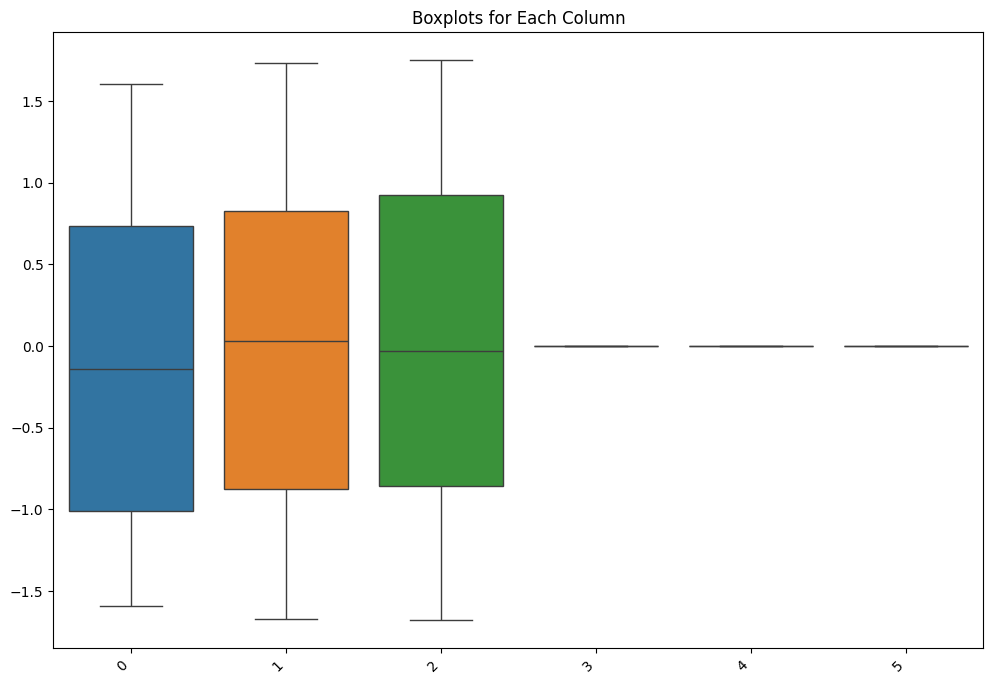

In [16]:
print(X_train)
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot for each column in the DataFrame
sns.boxplot(data=X_train)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add a title to the plot
plt.title('Boxplots for Each Column')

# Show the plot
plt.show()

print(X_train_scaled)
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot for each column in the DataFrame
sns.boxplot(data=X_train_scaled)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add a title to the plot
plt.title('Boxplots for Each Column')

# Show the plot
plt.show()

### Check for duplicate values

In [17]:
# Use the duplicated method to check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Region, Country, City, Month, Day, Year, AvgTemperature]
Index: []


No duplicate values there fore no need to delete them

### Implementing the KNN regressor and fit the data to train

In [18]:
# Train a Random Forest regressor on the scaled training data
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [19]:
# Fitting the data
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

### Predicting the values for validation set using the model

In [20]:
# Make predictions on the validation set
y_val_pred = knn_regressor.predict(X_val_scaled)

### Calculating mean square error for validation set

In [21]:
# Evaluate the performance on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation Mean Squared Error: {val_mse:.2f}')

Validation Mean Squared Error: 2.91


### Calculating mean square error for testing set

In [22]:
# Make predictions on the test set
y_test_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the performance on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test Mean Squared Error: {test_mse:.2f}')


Test Mean Squared Error: 2.96


### Plotting graphs for each city to analyze differnce between actual value and predicted value

            Actual  Predicted  Difference
Date                                     
1995-01-09    81.0  79.466667   -1.533333
1995-01-18    79.2  79.033333   -0.166667
1995-01-20    82.2  78.400000   -3.800000
1995-01-24    79.1  81.800000    2.700000
1995-01-31    81.8  80.133333   -1.666667
...            ...        ...         ...
2020-04-06    85.7  84.900000   -0.800000
2020-04-10    84.5  85.100000    0.600000
2020-04-19    83.1  81.900000   -1.200000
2020-04-20    85.4  82.533333   -2.866667
2020-05-13    79.2  84.400000    5.200000

[1390 rows x 3 columns]


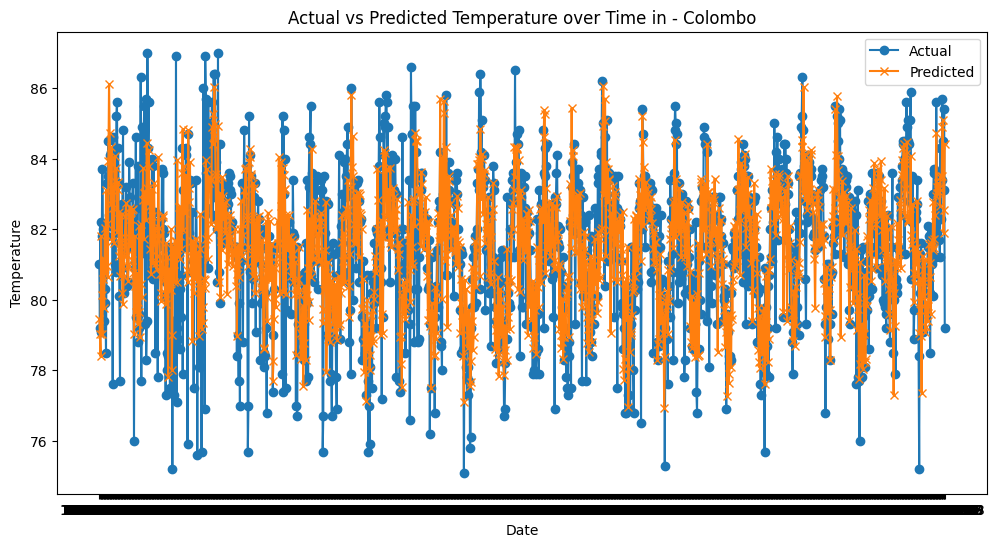

In [23]:
region_column = 'City'
unique_regions = df[region_column].unique()

# Iterate through each unique region
for region in unique_regions:
    #create a dataframe
    output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred , 'Difference': y_test_pred - y_test})

    # Sort DataFrame by date for proper plotting
    output_df.sort_index(inplace=True)
    print(output_df)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(output_df.index, output_df['Actual'], label='Actual', marker='o')
    plt.plot(output_df.index, output_df['Predicted'], label='Predicted', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Actual vs Predicted Temperature over Time in - {region}')
    plt.legend()
    plt.show()

In [24]:
def calculate_mape(actual, predicted):
    # Ensure actual values are not zero to avoid division by zero
    actual_nonzero = actual[actual != 0]
    
    # Calculate absolute percentage error for each observation
    ape = np.abs((actual_nonzero - predicted[actual != 0]) / actual_nonzero)
    
    # Calculate mean absolute percentage error
    mape = np.mean(ape) * 100
    
    return mape

# Example usage:
actual_values = y_test
predicted_values = y_test_pred

mape_result = calculate_mape(actual_values, predicted_values)
print(f'MAPE: {mape_result:.2f}%')
print(f'So accuracy: {(100-mape_result):.2f}%')

MAPE: 1.61%
So accuracy: 98.39%


### Use cross validation to optimizing hyperparameters

In [25]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN Regressor
knn_regressor = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", mse)



Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Mean Squared Error on Test Set: 2.629276221520511


In [26]:
def calculate_mape(actual, predicted):
    # Ensure actual values are not zero to avoid division by zero
    actual_nonzero = actual[actual != 0]
    
    # Calculate absolute percentage error for each observation
    ape = np.abs((actual_nonzero - predicted[actual != 0]) / actual_nonzero)
    
    # Calculate mean absolute percentage error
    mape = np.mean(ape) * 100
    
    return mape

# Example usage:
actual_values = y_test
predicted_values = y_test_pred

mape_result = calculate_mape(actual_values, predicted_values)
print(f'MAPE: {mape_result:.2f}%')
print(f'So accuracy: {(100-mape_result):.2f}%')

MAPE: 1.51%
So accuracy: 98.49%


# Average Temperature Prediction Using Random Forest Regression.

In [27]:
# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_numerical, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Use StandardScaler on the KMeans-transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Train a Random Forest regressor on the scaled training data
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = rf_regressor.predict(X_val_scaled)

# Evaluate the performance on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation Mean Squared Error: {val_mse:.2f}')

# Make predictions on the test set
y_test_pred = rf_regressor.predict(X_test_scaled)

# Evaluate the performance on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test Mean Squared Error: {test_mse:.2f}')

Validation Mean Squared Error: 2.34
Test Mean Squared Error: 2.52


### Optimizing hyperparameters using randomized search

In [28]:
# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': sp_randint(50, 200),
    'max_depth': [None] + list(sp_randint(10, 20).rvs(10)),
    'min_samples_split': sp_randint(2, 10)
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", mse)

            Actual  Predicted
Date                         
1995-01-01    86.1  80.874341
1995-01-01    78.8  76.809039
1995-01-02    81.0  81.000000
1995-01-04    79.5  79.867442
1995-01-05    74.8  75.797205
...            ...        ...
2020-05-07    85.7  84.429093
2020-05-08    90.4  89.841075
2020-05-10    89.4  89.146361
2020-05-10    87.9  89.431044
2020-05-12    84.2  82.724194

[6288 rows x 2 columns]


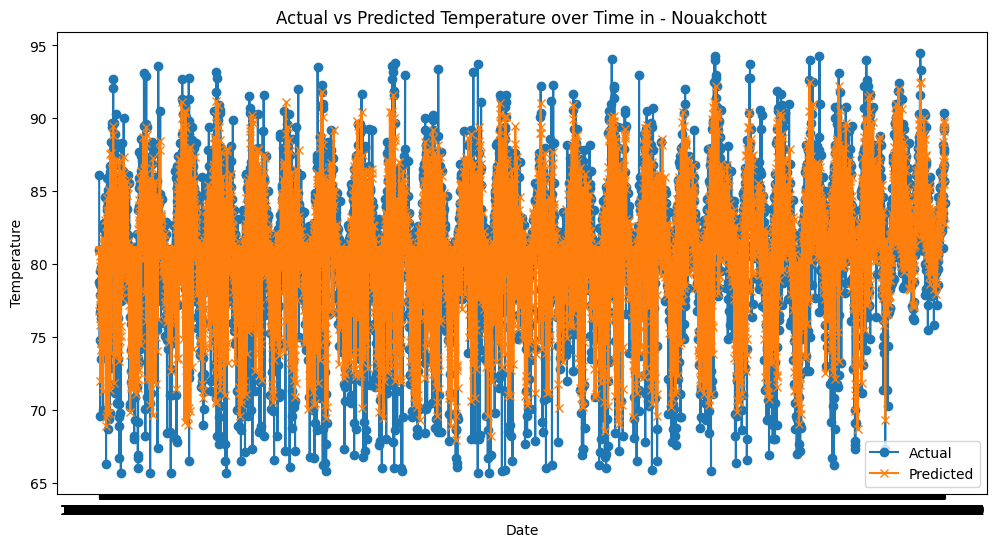

            Actual  Predicted
Date                         
1995-01-01    86.1  80.874341
1995-01-01    78.8  76.809039
1995-01-02    81.0  81.000000
1995-01-04    79.5  79.867442
1995-01-05    74.8  75.797205
...            ...        ...
2020-05-07    85.7  84.429093
2020-05-08    90.4  89.841075
2020-05-10    89.4  89.146361
2020-05-10    87.9  89.431044
2020-05-12    84.2  82.724194

[6288 rows x 2 columns]


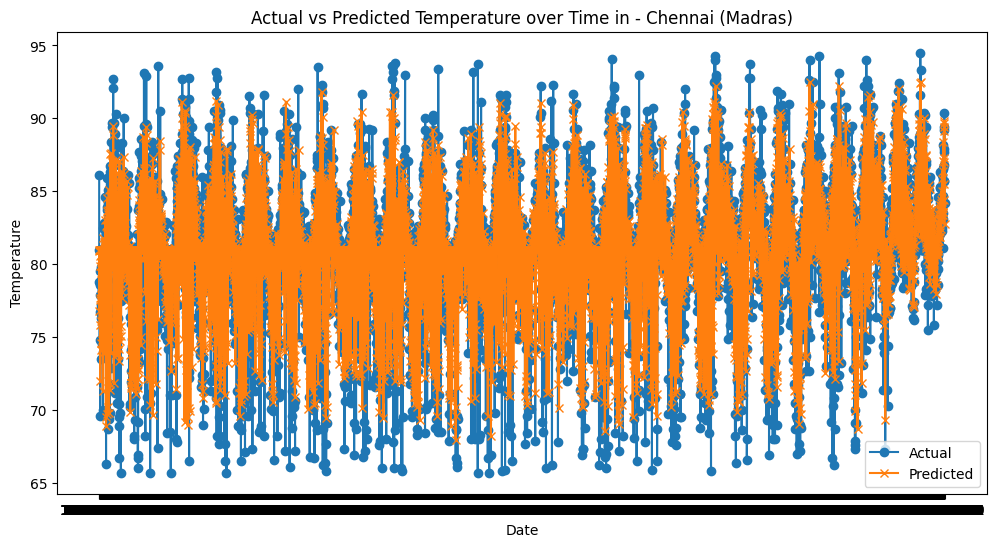

            Actual  Predicted
Date                         
1995-01-01    86.1  80.874341
1995-01-01    78.8  76.809039
1995-01-02    81.0  81.000000
1995-01-04    79.5  79.867442
1995-01-05    74.8  75.797205
...            ...        ...
2020-05-07    85.7  84.429093
2020-05-08    90.4  89.841075
2020-05-10    89.4  89.146361
2020-05-10    87.9  89.431044
2020-05-12    84.2  82.724194

[6288 rows x 2 columns]


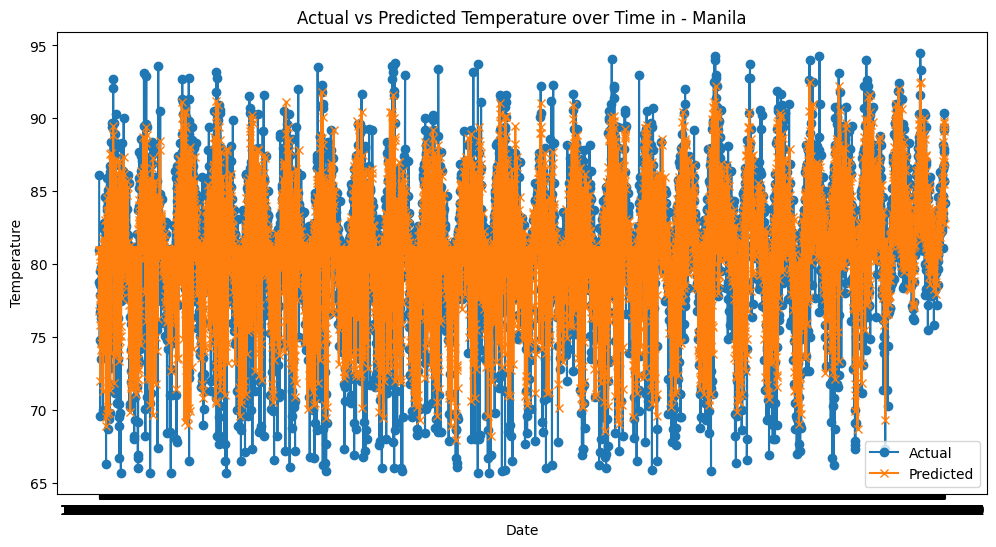

            Actual  Predicted
Date                         
1995-01-01    86.1  80.874341
1995-01-01    78.8  76.809039
1995-01-02    81.0  81.000000
1995-01-04    79.5  79.867442
1995-01-05    74.8  75.797205
...            ...        ...
2020-05-07    85.7  84.429093
2020-05-08    90.4  89.841075
2020-05-10    89.4  89.146361
2020-05-10    87.9  89.431044
2020-05-12    84.2  82.724194

[6288 rows x 2 columns]


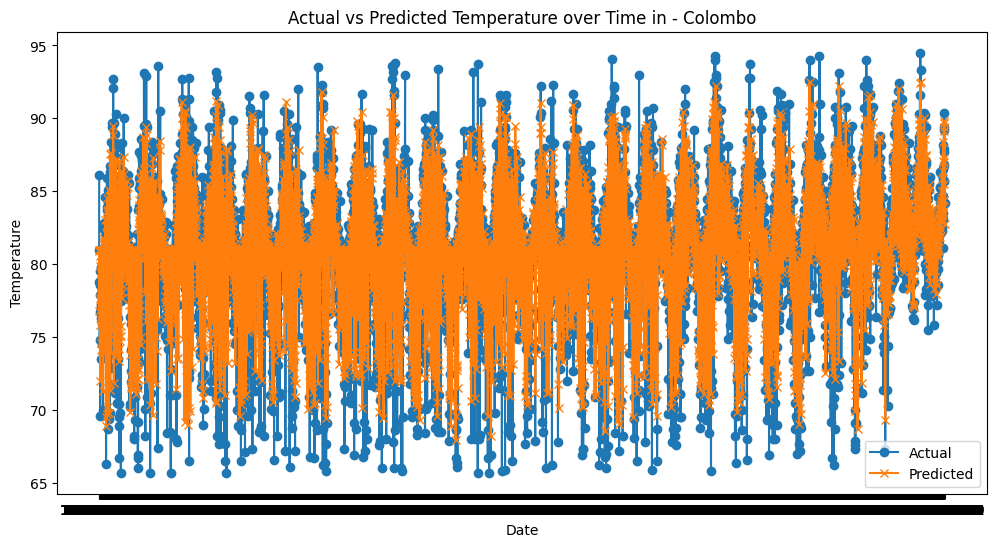

            Actual  Predicted
Date                         
1995-01-01    86.1  80.874341
1995-01-01    78.8  76.809039
1995-01-02    81.0  81.000000
1995-01-04    79.5  79.867442
1995-01-05    74.8  75.797205
...            ...        ...
2020-05-07    85.7  84.429093
2020-05-08    90.4  89.841075
2020-05-10    89.4  89.146361
2020-05-10    87.9  89.431044
2020-05-12    84.2  82.724194

[6288 rows x 2 columns]


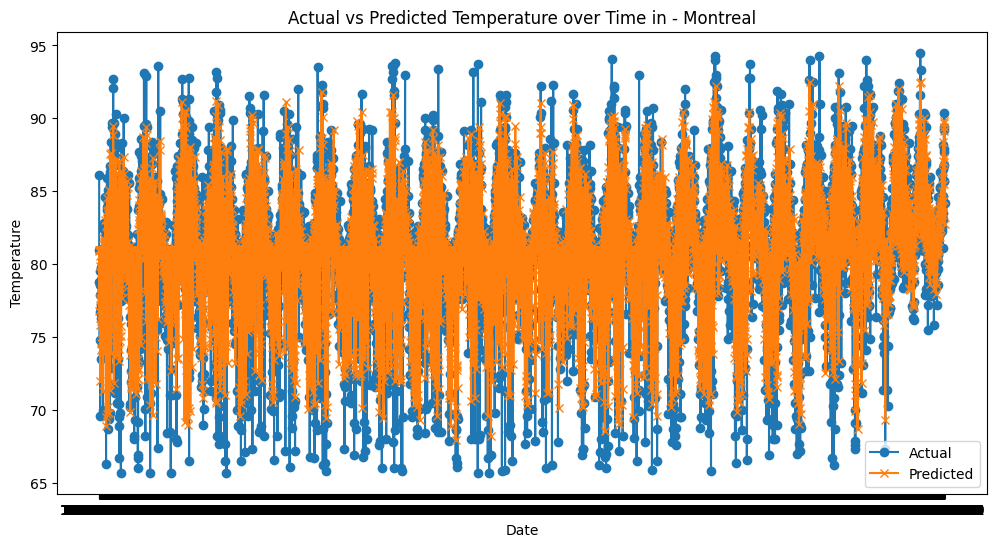

In [ ]:
region_column = 'City'
unique_regions = df[region_column].unique()

# Iterate through each unique region
for region in unique_regions:
    #create a dataframe
    output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

    # Sort DataFrame by date for proper plotting
    output_df.sort_index(inplace=True)
    print(output_df)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(output_df.index, output_df['Actual'], label='Actual', marker='o')
    plt.plot(output_df.index, output_df['Predicted'], label='Predicted', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Actual vs Predicted Temperature over Time in - {region}')
    plt.legend()
    plt.show()

In [ ]:
def calculate_mape(actual, predicted):
    # Ensure actual values are not zero to avoid division by zero
    actual_nonzero = actual[actual != 0]
    
    # Calculate absolute percentage error for each observation
    ape = np.abs((actual_nonzero - predicted[actual != 0]) / actual_nonzero)
    
    # Calculate mean absolute percentage error
    mape = np.mean(ape) * 100
    
    return mape

# Example usage:
actual_values = y_test
predicted_values = y_test_pred

mape_result = calculate_mape(actual_values, predicted_values)
print(f'MAPE: {mape_result:.2f}%')
print(f'So accuracy: {(100-mape_result):.2f}%')

MAPE: 2.09%
So accuracy: 97.91%
